## This will just test the formula

In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt

In [2]:
# sFile = '/afs/hep.wisc.edu/bechtol-group/MegansThings/balrog_detection_catalog_sof_run2_stars_v1.4_avg_added_match_flags.fits'
sFile = '/afs/hep.wisc.edu/bechtol-group/MegansThings/balrog_matched_catalog_sof_run2_stars_v1.4.fits'
gFile = '/hdfs/bechtol/balrog/y3/balrog_matched_catalog_sof_y3-merged_v1.2.fits'

In [3]:
sDataExt = fitsio.read(sFile, columns = ['meas_EXTENDED_CLASS_SOF'])
gDataExt = fitsio.read(gFile, columns = ['meas_EXTENDED_CLASS_SOF', 'true_bdf_mag_deredden', 'meas_cm_T', 'meas_tilename'])

IOStream.flush timed out


In [4]:
sData = sDataExt['meas_EXTENDED_CLASS_SOF']
gMag = gDataExt['true_bdf_mag_deredden'][:,2]
gSize = gDataExt['meas_cm_T']
gData = gDataExt['meas_EXTENDED_CLASS_SOF']
gTile = gDataExt['meas_tilename']
sData = sData[np.where(sData >= 0)[0]]
inds = np.where((gData >= 0) & (gMag < 37.5))[0]
gMag = gMag[inds]
gData = gData[inds]
gSize = gSize[inds]
gTile = gTile[inds]

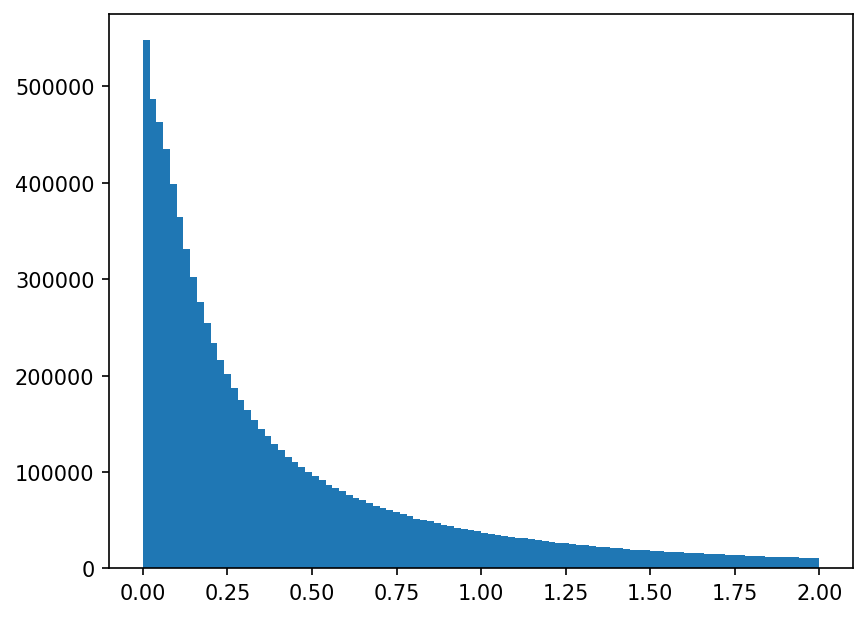

In [5]:
plt.figure(dpi = 150)
plt.hist(gSize, bins = np.linspace(0, 2, 101))
# plt.yscale('log')
plt.show()

In [6]:
Sa = len(sData)
Ga = len(gData)

In [7]:
Sm = len(np.where((sData == 0) | (sData == 1))[0]) + len(np.where((gData == 0) | (gData == 1))[0])
Gm = len(np.where((sData == 2) | (sData == 3))[0]) + len(np.where((gData == 2) | (gData == 3))[0])

In [8]:
Rs = len(np.where((sData == 0) | (sData == 1))[0]) / Sa
Rg = len(np.where((gData == 2) | (gData == 3))[0]) / Ga

In [9]:
print(int((Rg * Sm + Rg * Gm - Gm) / (Rs + Rg - 1)) == Sa)
print(int((Rs * Gm + Rs * Sm - Sm) / (Rs + Rg - 1)) == Ga)

False
True


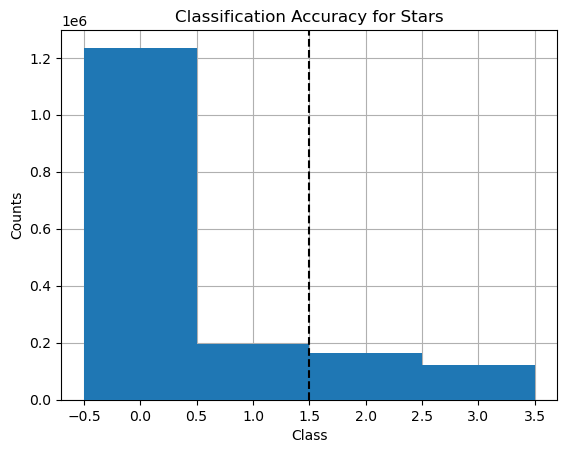

In [10]:
plt.figure(dpi = 100)
plt.hist(sData, bins = np.linspace(-0.5, 3.5, 5), zorder = 3)
plt.grid(zorder = 0)
plt.ylabel('Counts')
plt.xlabel('Class')
plt.title('Classification Accuracy for Stars')
plt.axvline(x = 1.5, color = 'k', linestyle = '--', zorder = 4)
plt.show()

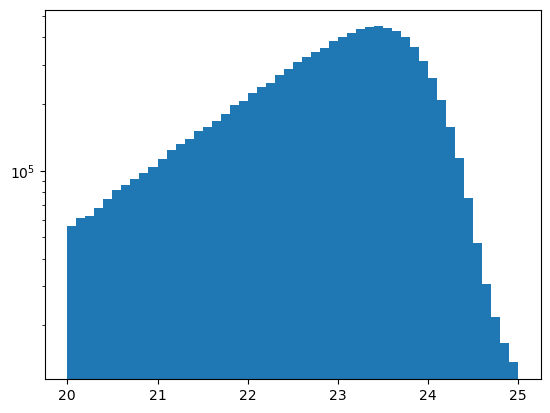

In [11]:
plt.figure(dpi = 100)
plt.hist(gMag, bins = np.linspace(20, 25, 51))
plt.yscale('log')
plt.show()

In [12]:
gBins = np.linspace(20, 25, 51)
gBinned = []
for i in np.arange(len(gBins) - 1):
    gBinned.append(gData[np.where((gMag >= gBins[i]) & (gMag < gBins[i + 1]))[0]])
gBinned = np.array(gBinned, dtype = object)

In [13]:
RgBins = []
for data in gBinned:
    RgBins.append(len(np.where((data == 2) | (data == 3))[0]) / len(data))
RgBins = np.array(RgBins)

In [14]:
fitParams = np.polyfit(np.linspace(20.05, 24.95, 50), RgBins, 8)
x = np.linspace(20, 25, 10000)
y = np.full(len(x), 0.0)
for i in range(len(fitParams)):
    y += fitParams[i] * x**(len(fitParams) - i - 1)

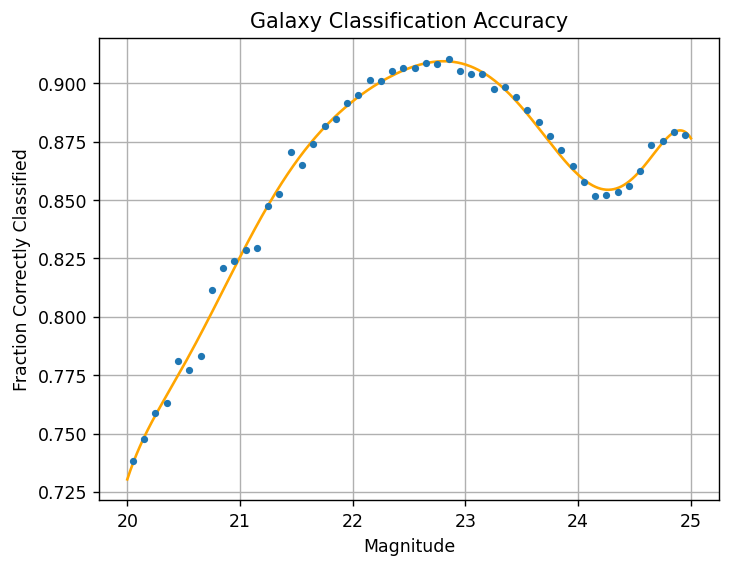

In [15]:
plt.figure(dpi = 125)
plt.scatter(np.linspace(20.05, 24.95, 50), RgBins, zorder = 4, s = 10)
plt.plot(x, y, color = 'orange', zorder = 3)
plt.grid(zorder = 0)
plt.title('Galaxy Classification Accuracy')
plt.xlabel('Magnitude')
plt.ylabel('Fraction Correctly Classified')
plt.show()

In [16]:
gSizeMis = gSize[np.where((gData == 0) | (gData == 1))[0]]

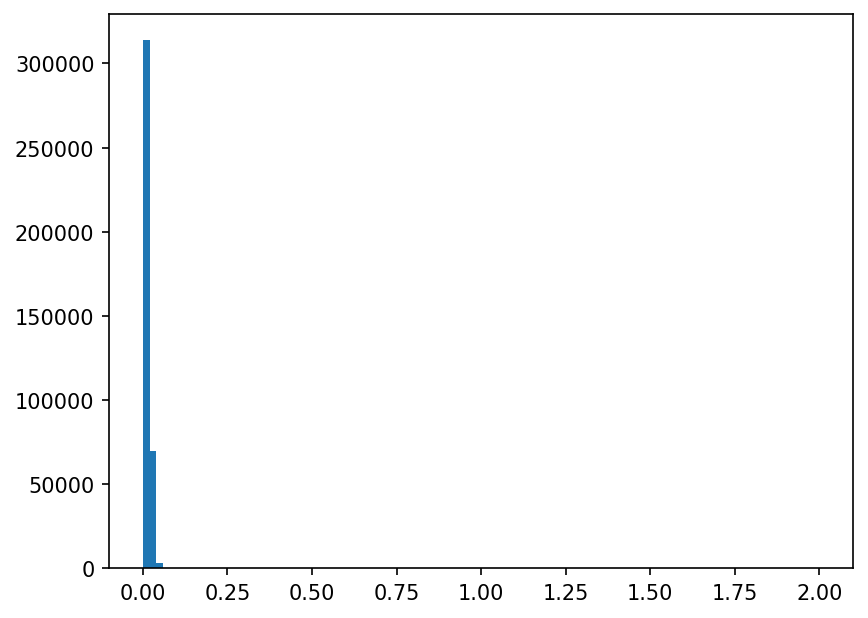

In [25]:
plt.figure(dpi = 150)
plt.hist(gSizeMis, bins = np.linspace(0, 2, 101))
plt.show()

In [18]:
gTileMis = np.sort(gTile[np.where((gData == 0) | (gData == 1))[0]])

In [19]:
gTileMis

array(['DES0000+0209', 'DES0000+0209', 'DES0000+0209', ...,
       'DES2359-4540', 'DES2359-4540', 'DES2359-4540'], dtype='<U12')

In [20]:
gTileMisU = np.unique(gTileMis)
repCounts = np.zeros(len(gTileMisU))

In [21]:
# These are indices that will be looping through the pixStar and starPix arrays in parallel.
uniqInd = 0
galaInd = 0

while galaInd < len(gTileMis):
    if gTileMisU[uniqInd] == gTileMis[galaInd]: # If the pixels match up in the arrays.
        repCounts[uniqInd] += 1                # Add one for the detection..
        galaInd += 1                         # Add one to the starInd to see if the next index in starPix is also the same.
        # Since the last index of pixStar and starPix are the same, starInd will increase the last time through the loop,
        # making this the index that we must restrict in the while loop.
    else:
        uniqInd += 1 # If the pixels are no longer the same, increase the index you check in the pixStar array.

In [22]:
sortCounts = np.sort(repCounts)

In [23]:
print(gTileMisU[np.where(repCounts >= sortCounts[-5])[0]])

['DES0400-3832' 'DES0438-6248' 'DES0607-5748' 'DES0609-5914'
 'DES2218-4206']
